In [1]:
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)

2.18.1


In [2]:
import numpy as np
import pandas as pd

Species_df = pd.read_csv('Species_data.csv')

Species_df.head()

,category,genus,family,order,class,phylum,pop_state,size_confidence,trend_confidence,bio_status,...,report_group_Marine invertebrates,report_group_Marine mammals,report_group_Mosses,report_group_Reptiles,report_group_Seabirds,"report_group_Sharks, rays, and chimaeras",report_group_Shorebirds,report_group_Terrestrial birds,report_group_Terrestrial invertebrates,report_group_Vascular plants
0,1,120,98,42.0,10.0,7.0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,401,98,42.0,10.0,7.0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,0,1066,148,9.0,1.0,1.0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,1465,28,9.0,1.0,1.0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,1466,499,9.0,1.0,1.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [3]:
threat_map = {1: 'Not Threatened', 0: 'At Risk', 2: 'Threatened'}

Species_df['category'] = Species_df['category'].map(threat_map)

to_numeric = {'Not Threatened': 0, 'At Risk': 1, 'Threatened': 2}

Species_df['category'] = Species_df['category'].map(to_numeric)

Species_df['category'].value_counts()

category
0    4301
1    3079
2     908
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = Species_df['category']
X = Species_df.drop(columns='category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84)

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [5]:
neural = tf.keras.Sequential([
    layers.Input(shape=(35,)),
    layers.Dense(70, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,423 (29.00 KB)

 Trainable params: 7,423 (29.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
neural.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [7]:
training = neural.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5098 - loss: 0.9266 - val_accuracy: 0.6115 - val_loss: 0.7829
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.6284 - loss: 0.7244 - val_accuracy: 0.6908 - val_loss: 0.6568
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7017 - loss: 0.6334 - val_accuracy: 0.7235 - val_loss: 0.6287
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7076 - loss: 0.6126 - val_accuracy: 0.7330 - val_loss: 0.6025
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7374 - loss: 0.5843 - val_accuracy: 0.7459 - val_loss: 0.5767
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7186 - loss: 0.5785 - val_accuracy: 0.7502 - val_loss: 0.5686
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.7435 - loss: 0.5510 - val_accuracy: 0.7407 - val_loss: 0.5683
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7598 - loss: 0.5389 - 

In [8]:
loss, accuracy = neural.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 415us/step - accuracy: 0.7238 - loss: 0.5711
Test Loss: 0.571
Test Accuracy: 0.724


In [9]:
# def create_model(num_hidden_layers=1,layer_size=32,activation='relu', optimizer='adam', learning_rate=0.001):
#     model = tf.keras.Sequential()
#     model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
#     for _ in range(num_hidden_layers):
#         model.add(layers.Dense(layer_size, activation=activation))
#     model.add(layers.Dense(3, activation='softmax'))

#     opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer='adam', loss='spare_classification_crossentropy', metrics=['accuracy', 'loss'])

    

In [10]:
# if hasattr(tf.keras, 'wrappers'):
#     print(dir(tf.keras.wrappers))
#     if hasattr(tf.keras.wrappers, 'scikit_learn'):
#         print(dir(tf.keras.wrappers.scikit_learn))

In [11]:
# from tensorflow.keras.wrappers import SKLearnClassifier


In [12]:
# from tensorflow.keras import layers
# from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

# keras_clf = SKLearnClassifier(model=create_model)

In [13]:
param_grid = {
    'num_hidden_layers': [1, 2],
    'layer_size': [70, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam'],
    'learning_rate': [0.01, 0.001],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

In [14]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neural_network import MLPClassifier

# grid_search = GridSearchCV(estimator=neural, param_grid=param_grid, scoring='accuracy', cv=3)


In [15]:
# grid_search.fit(X_train_scaled, y_train)

In [16]:
neural2 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural2.summary()

neural2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural2.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2)


/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,783 (30.40 KB)

 Trainable params: 7,783 (30.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.5534 - loss: 0.9396 - val_accuracy: 0.6494 - val_loss: 0.7656
Epoch 2/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.6596 - loss: 0.7138 - val_accuracy: 0.6632 - val_loss: 0.6639
Epoch 3/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.6723 - loss: 0.6576 - val_accuracy: 0.6649 - val_loss: 0.6520
Epoch 4/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.6945 - loss: 0.6304 - val_accuracy: 0.7339 - val_loss: 0.6101
Epoch 5/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7396 - loss: 0.5808 - val_accuracy: 0.7192 - val_loss: 0.5918
Epoch 6/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7360 - loss: 0.5787 - val_accuracy: 0.7450 - val_loss: 0.5794
Epoch 7/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.7376 - loss: 0.5728 - val_accuracy: 0.7063 - val_loss: 0.6005
Epoch 8/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.7418 - loss: 0.5397 - 

In [17]:
neural3 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(35, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural3.summary()

neural3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural3.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 35)             │         1,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,193 (35.91 KB)

 Trainable params: 9,193 (35.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.4858 - loss: 0.9732 - val_accuracy: 0.6632 - val_loss: 0.7679
Epoch 2/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.6540 - loss: 0.7121 - val_accuracy: 0.6572 - val_loss: 0.6733
Epoch 3/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.6880 - loss: 0.6528 - val_accuracy: 0.7287 - val_loss: 0.6191
Epoch 4/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.7071 - loss: 0.6076 - val_accuracy: 0.7270 - val_loss: 0.6124
Epoch 5/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7248 - loss: 0.5938 - val_accuracy: 0.7519 - val_loss: 0.5809
Epoch 6/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7372 - loss: 0.5669 - val_accuracy: 0.7425 - val_loss: 0.5644
Epoch 7/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.7465 - loss: 0.5592 - val_accuracy: 0.7494 - val_loss: 0.5506
Epoch 8/40
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.7546 - loss: 0.5456 - 

In [18]:
neural4 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(35, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural4.summary()

neural4.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural4.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 35)             │         1,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,338 (36.48 KB)

 Trainable params: 9,338 (36.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.5435 - loss: 0.9317 - val_accuracy: 0.5642 - val_loss: 0.7724
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.6374 - loss: 0.7276 - val_accuracy: 0.6899 - val_loss: 0.6826
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.6915 - loss: 0.6614 - val_accuracy: 0.7149 - val_loss: 0.6301
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.7152 - loss: 0.6151 - val_accuracy: 0.7149 - val_loss: 0.6007
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.7263 - loss: 0.6041 - val_accuracy: 0.7519 - val_loss: 0.5680
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7507 - loss: 0.5662 - val_accuracy: 0.7476 - val_loss: 0.5702
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7442 - loss: 0.5613 - val_accuracy: 0.7313 - val_loss: 0.5729
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7534 - loss: 0.5490 - 

In [19]:
neural5 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(35, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural5.summary()

neural5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural5.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 35)             │         1,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,708 (37.92 KB)

 Trainable params: 9,708 (37.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4061 - loss: 0.9973 - val_accuracy: 0.5624 - val_loss: 0.8483
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5670 - loss: 0.8260 - val_accuracy: 0.6064 - val_loss: 0.7810
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.6391 - loss: 0.7462 - val_accuracy: 0.6899 - val_loss: 0.6662
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6909 - loss: 0.6430 - val_accuracy: 0.6589 - val_loss: 0.6694
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7149 - loss: 0.6074 - val_accuracy: 0.7450 - val_loss: 0.6219
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.7345 - loss: 0.5840 - val_accuracy: 0.7373 - val_loss: 0.6080
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.7366 - loss: 0.5826 - val_accuracy: 0.7433 - val_loss: 0.5777
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.7560 - loss: 0.5

In [20]:
neural6 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(35, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural6.summary()

neural6.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural6.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 35)             │         1,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,033 (43.10 KB)

 Trainable params: 11,033 (43.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4260 - loss: 1.0484 - val_accuracy: 0.5004 - val_loss: 0.9143
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.5389 - loss: 0.8526 - val_accuracy: 0.5719 - val_loss: 0.8017
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5678 - loss: 0.7889 - val_accuracy: 0.6193 - val_loss: 0.7270
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.6554 - loss: 0.7115 - val_accuracy: 0.6649 - val_loss: 0.6661
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7153 - loss: 0.6305 - val_accuracy: 0.7115 - val_loss: 0.6724
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.7286 - loss: 0.6212 - val_accuracy: 0.7295 - val_loss: 0.6093
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7378 - loss: 0.5943 - val_accuracy: 0.7218 - val_loss: 0.6009
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.7471 - loss: 0.5

In [21]:
neural7 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(42, activation='relu'),
    layers.Dense(36, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(27, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural7.summary()

neural7.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural7.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 42)             │         2,142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 36)             │         1,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 30)             │         1,110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 27)             │           837 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 20)             │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,775 (49.90 KB)

 Trainable params: 12,775 (49.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4976 - loss: 0.9813 - val_accuracy: 0.5685 - val_loss: 0.8613
Epoch 2/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6109 - loss: 0.7671 - val_accuracy: 0.6563 - val_loss: 0.6872
Epoch 3/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6889 - loss: 0.6612 - val_accuracy: 0.6701 - val_loss: 0.6438
Epoch 4/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7016 - loss: 0.6211 - val_accuracy: 0.6537 - val_loss: 0.6395
Epoch 5/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7282 - loss: 0.5874 - val_accuracy: 0.7468 - val_loss: 0.5774
Epoch 6/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.7480 - loss: 0.5509 - val_accuracy: 0.7631 - val_loss: 0.5652
Epoch 7/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7390 - loss: 0.5573 - val_accuracy: 0.7468 - val_loss: 0.5668
Epoch 8/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.7532 - loss: 0.5

In [22]:
loss, accuracy = neural7.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 471us/step - accuracy: 0.7720 - loss: 0.8898
Test Loss: 0.890
Test Accuracy: 0.772


In [23]:
neural8 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(42, activation='relu'),
    layers.Dense(35, activation='relu'),
    layers.Dense(27, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(14, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural8.summary()

neural8.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural8.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 42)             │         2,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 35)             │         1,505 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 27)             │           972 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 20)             │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 14)             │           294 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,016 (35.22 KB)

 Trainable params: 9,016 (35.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5328 - loss: 1.0592 - val_accuracy: 0.5995 - val_loss: 0.8294
Epoch 2/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6345 - loss: 0.7559 - val_accuracy: 0.6357 - val_loss: 0.6917
Epoch 3/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6672 - loss: 0.6665 - val_accuracy: 0.6761 - val_loss: 0.6410
Epoch 4/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7161 - loss: 0.6127 - val_accuracy: 0.7442 - val_loss: 0.6085
Epoch 5/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.7095 - loss: 0.6189 - val_accuracy: 0.6891 - val_loss: 0.6149
Epoch 6/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7444 - loss: 0.5673 - val_accuracy: 0.7519 - val_loss: 0.5725
Epoch 7/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.7615 - loss: 0.5376 - val_accuracy: 0.7494 - val_loss: 0.5620
Epoch 8/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7611 - loss: 0.5

In [24]:
loss, accuracy = neural8.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 450us/step - accuracy: 0.7692 - loss: 0.7751
Test Loss: 0.775
Test Accuracy: 0.769


In [25]:
loss, accuracy = neural3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 442us/step - accuracy: 0.7696 - loss: 0.6026
Test Loss: 0.603
Test Accuracy: 0.770


In [26]:
loss, accuracy = neural4.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 448us/step - accuracy: 0.7547 - loss: 0.6168
Test Loss: 0.617
Test Accuracy: 0.755


In [27]:
loss, accuracy = neural5.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 462us/step - accuracy: 0.7664 - loss: 0.7209
Test Loss: 0.721
Test Accuracy: 0.766


In [28]:
loss, accuracy = neural6.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 416us/step - accuracy: 0.7684 - loss: 0.7185
Test Loss: 0.719
Test Accuracy: 0.768


In [29]:
loss, accuracy = neural7.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 437us/step - accuracy: 0.7720 - loss: 0.8898
Test Loss: 0.890
Test Accuracy: 0.772


In [30]:
neural9 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(42, activation='relu'),
    layers.Dense(35, activation='tanh'),
    layers.Dense(27, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(14, activation='relu'),
    layers.Dense(9, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural9.summary()

neural9.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural9.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 42)             │         2,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 35)             │         1,505 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 27)             │           972 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 20)             │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 14)             │           294 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 9)              │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,998 (35.15 KB)

 Trainable params: 8,998 (35.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5246 - loss: 0.9733 - val_accuracy: 0.6227 - val_loss: 0.8163
Epoch 2/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6388 - loss: 0.7606 - val_accuracy: 0.6374 - val_loss: 0.7327
Epoch 3/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.6647 - loss: 0.6857 - val_accuracy: 0.6675 - val_loss: 0.6650
Epoch 4/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.6997 - loss: 0.6286 - val_accuracy: 0.7209 - val_loss: 0.6175
Epoch 5/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.7266 - loss: 0.6006 - val_accuracy: 0.6951 - val_loss: 0.6175
Epoch 6/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7445 - loss: 0.5615 - val_accuracy: 0.7554 - val_loss: 0.5566
Epoch 7/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7493 - loss: 0.5786 - val_accuracy: 0.7709 - val_loss: 0.5637
Epoch 8/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7408 - loss: 0.5

In [31]:
loss, accuracy = neural9.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 433us/step - accuracy: 0.7668 - loss: 0.7872
Test Loss: 0.787
Test Accuracy: 0.767


In [32]:
neural10 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(45, activation='relu'),
    layers.Dense(35, activation='tanh'),
    layers.Dense(25, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(7, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural10.summary()

neural10.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural10.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.3)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 45)             │         3,195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 35)             │         1,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,586 (33.54 KB)

 Trainable params: 8,586 (33.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5074 - loss: 1.0173 - val_accuracy: 0.5853 - val_loss: 0.8635
Epoch 2/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5909 - loss: 0.8236 - val_accuracy: 0.6307 - val_loss: 0.7460
Epoch 3/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6447 - loss: 0.7284 - val_accuracy: 0.6703 - val_loss: 0.7081
Epoch 4/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.6597 - loss: 0.6841 - val_accuracy: 0.6651 - val_loss: 0.6580
Epoch 5/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.6832 - loss: 0.6386 - val_accuracy: 0.7295 - val_loss: 0.6108
Epoch 6/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.7149 - loss: 0.6273 - val_accuracy: 0.7140 - val_loss: 0.5993
Epoch 7/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7359 - loss: 0.5854 - val_accuracy: 0.7467 - val_loss: 0.5981
Epoch 8/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7384 - loss: 0.6

In [33]:
loss, accuracy = neural10.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 436us/step - accuracy: 0.7652 - loss: 0.7603
Test Loss: 0.760
Test Accuracy: 0.765


In [34]:
neural10 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(45, activation='relu'),
    layers.Dense(35, activation='tanh'),
    layers.Dense(25, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(7, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural10.summary()

neural10.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural10.fit(X_train_scaled, y_train, epochs=400, batch_size=32, validation_split=0.3)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 45)             │         3,195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 35)             │         1,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,586 (33.54 KB)

 Trainable params: 8,586 (33.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4957 - loss: 0.9737 - val_accuracy: 0.5727 - val_loss: 0.8049
Epoch 2/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.6331 - loss: 0.7495 - val_accuracy: 0.6611 - val_loss: 0.6805
Epoch 3/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.6820 - loss: 0.6664 - val_accuracy: 0.6847 - val_loss: 0.6307
Epoch 4/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.7095 - loss: 0.6112 - val_accuracy: 0.7243 - val_loss: 0.6090
Epoch 5/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7341 - loss: 0.5997 - val_accuracy: 0.7065 - val_loss: 0.6426
Epoch 6/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.7216 - loss: 0.5989 - val_accuracy: 0.7352 - val_loss: 0.5810
Epoch 7/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.7409 - loss: 0.5579 - val_accuracy: 0.7404 - val_loss: 0.5763
Epoch 8/400
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7421 - loss: 0.5

In [35]:
loss, accuracy = neural10.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 426us/step - accuracy: 0.7668 - loss: 1.1452
Test Loss: 1.145
Test Accuracy: 0.767


In [36]:
# print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

In [37]:
neural11 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(45, activation='relu'),
    layers.Dense(35, activation='tanh'),
    layers.Dense(25, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural11.summary()

neural11.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural11.fit(X_train_scaled, y_train, epochs=250, batch_size=27, validation_split=0.25)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 45)             │         3,195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 35)             │         1,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,808 (34.41 KB)

 Trainable params: 8,808 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5531 - loss: 0.9191 - val_accuracy: 0.6368 - val_loss: 0.7351
Epoch 2/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.6747 - loss: 0.6949 - val_accuracy: 0.7229 - val_loss: 0.6212
Epoch 3/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7043 - loss: 0.6303 - val_accuracy: 0.7471 - val_loss: 0.5976
Epoch 4/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7445 - loss: 0.5832 - val_accuracy: 0.7491 - val_loss: 0.5701
Epoch 5/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7551 - loss: 0.5620 - val_accuracy: 0.7416 - val_loss: 0.5662
Epoch 6/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7342 - loss: 0.5806 - val_accuracy: 0.7512 - val_loss: 0.5425
Epoch 7/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7691 - loss: 0.5192 - val_accuracy: 0.7609 - val_loss: 0.5421
Epoch 8/250
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.7648 - loss: 0.5

In [38]:
loss, accuracy = neural11.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 428us/step - accuracy: 0.7664 - loss: 1.1178
Test Loss: 1.118
Test Accuracy: 0.766


In [39]:
X_val_scaled = X_test_scaled
y_val = y_test

In [40]:
def build_model(num_hidden_layers, layer_size_list, activation='relu', output_activation='softmax'):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    if len(layer_size_list) != num_hidden_layers:
        raise ValueError("Length of layer sizes not equal")
    
    for size in layer_size_list:
        model.add(layers.Dense(size, activation=activation))

    model.add(layers.Dense(3, activation=output_activation))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# hyperparameters

num_hidden_layers_to_test = [1,2,3]
layer_sizes_to_test = [[70], [70, 35], [70, 32, 14], [70, 45, 15], [70, 49, 28]]
activation_functions_to_test = ['relu', 'tanh']

best_val_accuracy = 0.0
best_model_config = None
all_histories = {}




In [41]:
for num_layers in num_hidden_layers_to_test:
    for layer_sizes in layer_sizes_to_test:
        if len(layer_sizes) == num_layers:
            for activation in activation_functions_to_test:
                print(f"\nTesting model with {num_layers} hidden layers, sizes {layer_sizes}, activation {activation}")

                model = build_model(num_layers, layer_sizes, activation)
                history = model.fit(
                    X_train_scaled, y_train,
                    epochs=100,
                    batch_size=35,
                    validation_data=(X_val_scaled, y_val),
                    verbose=0
                )

                val_accuracy = history.history['val_accuracy'][-1]
                print(f'Validation Accuracy: {val_accuracy:.4f}')

                config_str = f"Layers: {num_layers}, Sizes: {layer_sizes}, Activation: {activation}"
                all_histories[config_str] = history.history

                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_model_config = {"num_layers": num_layers, "layer_sizes": layer_sizes, "activation": activation}
                    best_model = model

print("\nBest Model Configuration:")
print(f"Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Hyperparameters: {best_model_config}")



Testing model with 1 hidden layers, sizes [70], activation relu
Validation Accuracy: 0.7833

Testing model with 1 hidden layers, sizes [70], activation tanh
Validation Accuracy: 0.7362

Testing model with 2 hidden layers, sizes [70, 35], activation relu
Validation Accuracy: 0.7801

Testing model with 2 hidden layers, sizes [70, 35], activation tanh
Validation Accuracy: 0.7768

Testing model with 3 hidden layers, sizes [70, 32, 14], activation relu
Validation Accuracy: 0.7833

Testing model with 3 hidden layers, sizes [70, 32, 14], activation tanh
Validation Accuracy: 0.7784

Testing model with 3 hidden layers, sizes [70, 45, 15], activation relu
Validation Accuracy: 0.7720

Testing model with 3 hidden layers, sizes [70, 45, 15], activation tanh
Validation Accuracy: 0.7567

Testing model with 3 hidden layers, sizes [70, 49, 28], activation relu
Validation Accuracy: 0.7760

Testing model with 3 hidden layers, sizes [70, 49, 28], activation tanh
Validation Accuracy: 0.7861

Best Model Co

In [42]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [43]:
def build_model(num_hidden_layers, layer_size_list, activation='relu', output_activation='softmax'):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    if len(layer_size_list) != num_hidden_layers:
        raise ValueError("Length of layer sizes not equal")
    
    for size in layer_size_list:
        model.add(layers.Dense(size, activation=activation))

    model.add(layers.Dense(3, activation=output_activation))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# hyperparameters

num_hidden_layers_to_test = [1,2,3]
layer_sizes_to_test = [[70], [55, 35], [49, 28], [50, 25, 15], [60, 35, 14], [49, 35, 27]]
activation_functions_to_test = ['relu']

best_val_accuracy = 0.0
best_model_config = None
all_histories = {}

for num_layers in num_hidden_layers_to_test:
    for layer_sizes in layer_sizes_to_test:
        if len(layer_sizes) == num_layers:
            for activation in activation_functions_to_test:
                print(f"\nTesting model with {num_layers} hidden layers, sizes {layer_sizes}, activation {activation}")

                model = build_model(num_layers, layer_sizes, activation)
                history = model.fit(
                    X_train_scaled, y_train,
                    epochs=100,
                    batch_size=35,
                    validation_data=(X_val_scaled, y_val),
                    verbose=0
                )

                val_accuracy = history.history['val_accuracy'][-1]
                print(f'Validation Accuracy: {val_accuracy:.4f}')

                config_str = f"Layers: {num_layers}, Sizes: {layer_sizes}, Activation: {activation}"
                all_histories[config_str] = history.history

                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_model_config = {"num_layers": num_layers, "layer_sizes": layer_sizes, "activation": activation}
                    best_model = model

print("\nBest Model Configuration:")
print(f"Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Hyperparameters: {best_model_config}")




Testing model with 1 hidden layers, sizes [70], activation relu
Validation Accuracy: 0.7764

Testing model with 2 hidden layers, sizes [55, 35], activation relu
Validation Accuracy: 0.7797

Testing model with 2 hidden layers, sizes [49, 28], activation relu
Validation Accuracy: 0.7881

Testing model with 3 hidden layers, sizes [50, 25, 15], activation relu
Validation Accuracy: 0.7869

Testing model with 3 hidden layers, sizes [60, 35, 14], activation relu
Validation Accuracy: 0.7744

Testing model with 3 hidden layers, sizes [49, 35, 27], activation relu
Validation Accuracy: 0.7797

Best Model Configuration:
Validation Accuracy: 0.7881
Hyperparameters: {'num_layers': 2, 'layer_sizes': [49, 28], 'activation': 'relu'}


In [44]:
neural12 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='tanh'),
    layers.Dense(15, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural12.summary()

neural12.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural12.fit(X_train_scaled, y_train, epochs=250, batch_size=27, validation_split=0.2)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)               │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,783 (30.40 KB)

 Trainable params: 7,783 (30.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.5458 - loss: 0.9140 - val_accuracy: 0.6761 - val_loss: 0.7190
Epoch 2/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.6542 - loss: 0.7020 - val_accuracy: 0.6520 - val_loss: 0.7004
Epoch 3/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.6952 - loss: 0.6269 - val_accuracy: 0.7020 - val_loss: 0.6017
Epoch 4/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.6971 - loss: 0.6138 - val_accuracy: 0.7149 - val_loss: 0.6141
Epoch 5/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.7239 - loss: 0.5978 - val_accuracy: 0.7356 - val_loss: 0.5929
Epoch 6/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7238 - loss: 0.5851 - val_accuracy: 0.7545 - val_loss: 0.5784
Epoch 7/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.7484 - loss: 0.5509 - val_accuracy: 0.7442 - val_loss: 0.5588
Epoch 8/250
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.7586 - loss: 0

In [45]:
loss, accuracy = neural12.evaluate(X_val_scaled, y_val, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 999us/step - accuracy: 0.7772 - loss: 0.9059
Test Loss: 0.906
Test Accuracy: 0.777


In [46]:
neural13 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(35, activation='relu'),
    layers.Dense(21, activation='relu'),
    layers.Dense(14, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural13.summary()

neural13.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural13.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.3)

/opt/anaconda3/envs/new_tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_146 (Dense)               │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 35)             │         2,485 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 21)             │           756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 14)             │           308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 3)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,114 (23.88 KB)

 Trainable params: 6,114 (23.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5157 - loss: 0.9625 - val_accuracy: 0.5836 - val_loss: 0.8078
Epoch 2/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.6346 - loss: 0.7499 - val_accuracy: 0.6795 - val_loss: 0.6919
Epoch 3/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6878 - loss: 0.6718 - val_accuracy: 0.7191 - val_loss: 0.6357
Epoch 4/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7275 - loss: 0.6151 - val_accuracy: 0.6772 - val_loss: 0.6387
Epoch 5/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7269 - loss: 0.6092 - val_accuracy: 0.7272 - val_loss: 0.5986
Epoch 6/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7319 - loss: 0.5936 - val_accuracy: 0.7295 - val_loss: 0.6238
Epoch 7/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.7267 - loss: 0.5961 - val_accuracy: 0.7318 - val_loss: 0.5852
Epoch 8/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7284 - loss: 0.5

In [47]:
loss, accuracy = neural13.evaluate(X_val_scaled, y_val, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 452us/step - accuracy: 0.7644 - loss: 0.8757
Test Loss: 0.876
Test Accuracy: 0.764


Best NN model config: 

neural13 = tf.keras.Sequential([
    layers.Dense(70, activation='relu', input_shape=(35,)),
    layers.Dense(35, activation='relu'),
    layers.Dense(21, activation='relu'),
    layers.Dense(14, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural13.summary()

neural13.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural13.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.3)

In [48]:
nn_pred = neural13.predict(X_val_scaled)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


In [49]:
from sklearn.metrics import confusion_matrix

nn_pred_classes = np.argmax(nn_pred, axis=1)

cm_nn = confusion_matrix(y_val, nn_pred_classes)

print(cm_nn)

[[1154  117   13]
 [ 254  606   65]
 [  37  100  141]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_val, nn_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1284
           1       0.74      0.66      0.69       925
           2       0.64      0.51      0.57       278

    accuracy                           0.76      2487
   macro avg       0.73      0.69      0.70      2487
weighted avg       0.76      0.76      0.76      2487



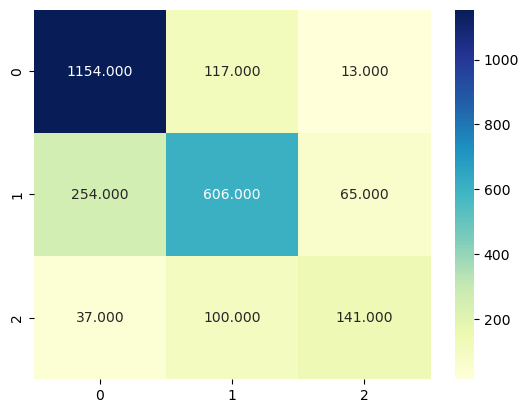

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_nn, annot=True, fmt='.3f', cmap='YlGnBu')
plt.show()

In [52]:
Species_df['category'].value_counts()

category
0    4301
1    3079
2     908
Name: count, dtype: int64

In [53]:
# threat_map = {1: 'Not Threatened', 0: 'At Risk', 2: 'Threatened'}

# Species_df['category'] = Species_df['category'].map(threat_map)

# to_numeric = {'Not Threatened': 0, 'At Risk': 1, 'Threatened': 2}

# Species_df['category'] = Species_df['category'].map(to_numeric)

# Species_df['category'].value_counts()

In [86]:
neural14 = tf.keras.Sequential([
    layers.Input(shape=(35,)),
    layers.Dense(45, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(3, activation='softmax')
])

neural14.summary()

neural14.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

training = neural14.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.25)

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_209 (Dense)               │ (None, 45)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 30)             │         1,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,093 (12.08 KB)

 Trainable params: 3,093 (12.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.5082 - loss: 0.9792 - val_accuracy: 0.5872 - val_loss: 0.8128
Epoch 2/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.6148 - loss: 0.7884 - val_accuracy: 0.6210 - val_loss: 0.7319
Epoch 3/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.6455 - loss: 0.7120 - val_accuracy: 0.6540 - val_loss: 0.6966
Epoch 4/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6607 - loss: 0.6840 - val_accuracy: 0.6713 - val_loss: 0.6633
Epoch 5/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.6965 - loss: 0.6463 - val_accuracy: 0.6837 - val_loss: 0.6369
Epoch 6/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7046 - loss: 0.6258 - val_accuracy: 0.6775 - val_loss: 0.6213
Epoch 7/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7074 - loss: 0.6198 - val_accuracy: 0.7312 - val_loss: 0.6065
Epoch 8/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7230 - loss: 0

In [87]:
loss, accuracy = neural14.evaluate(X_val_scaled, y_val, verbose=2)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

78/78 - 0s - 490us/step - accuracy: 0.7849 - loss: 0.5863
Test Loss: 0.586
Test Accuracy: 0.785
